In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

from joblib import dump

import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
random_state = 42

In [23]:
dataset_path = '../data/raw/diabetes.csv'
diabetes_df = pd.read_csv(dataset_path)

In [24]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Statistics

In [26]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# NaN values

In [27]:
diabetes_df.isnull().sum().T

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values are observed from the above code, which is misleading. In this dataset, 0 is used to encode missing values. Therefore, the 0 values must be replaced with NaN and then properly handled.

# Handling missing values

Replace 0 values with NaN:

In [28]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

diabetes_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Histograms of data

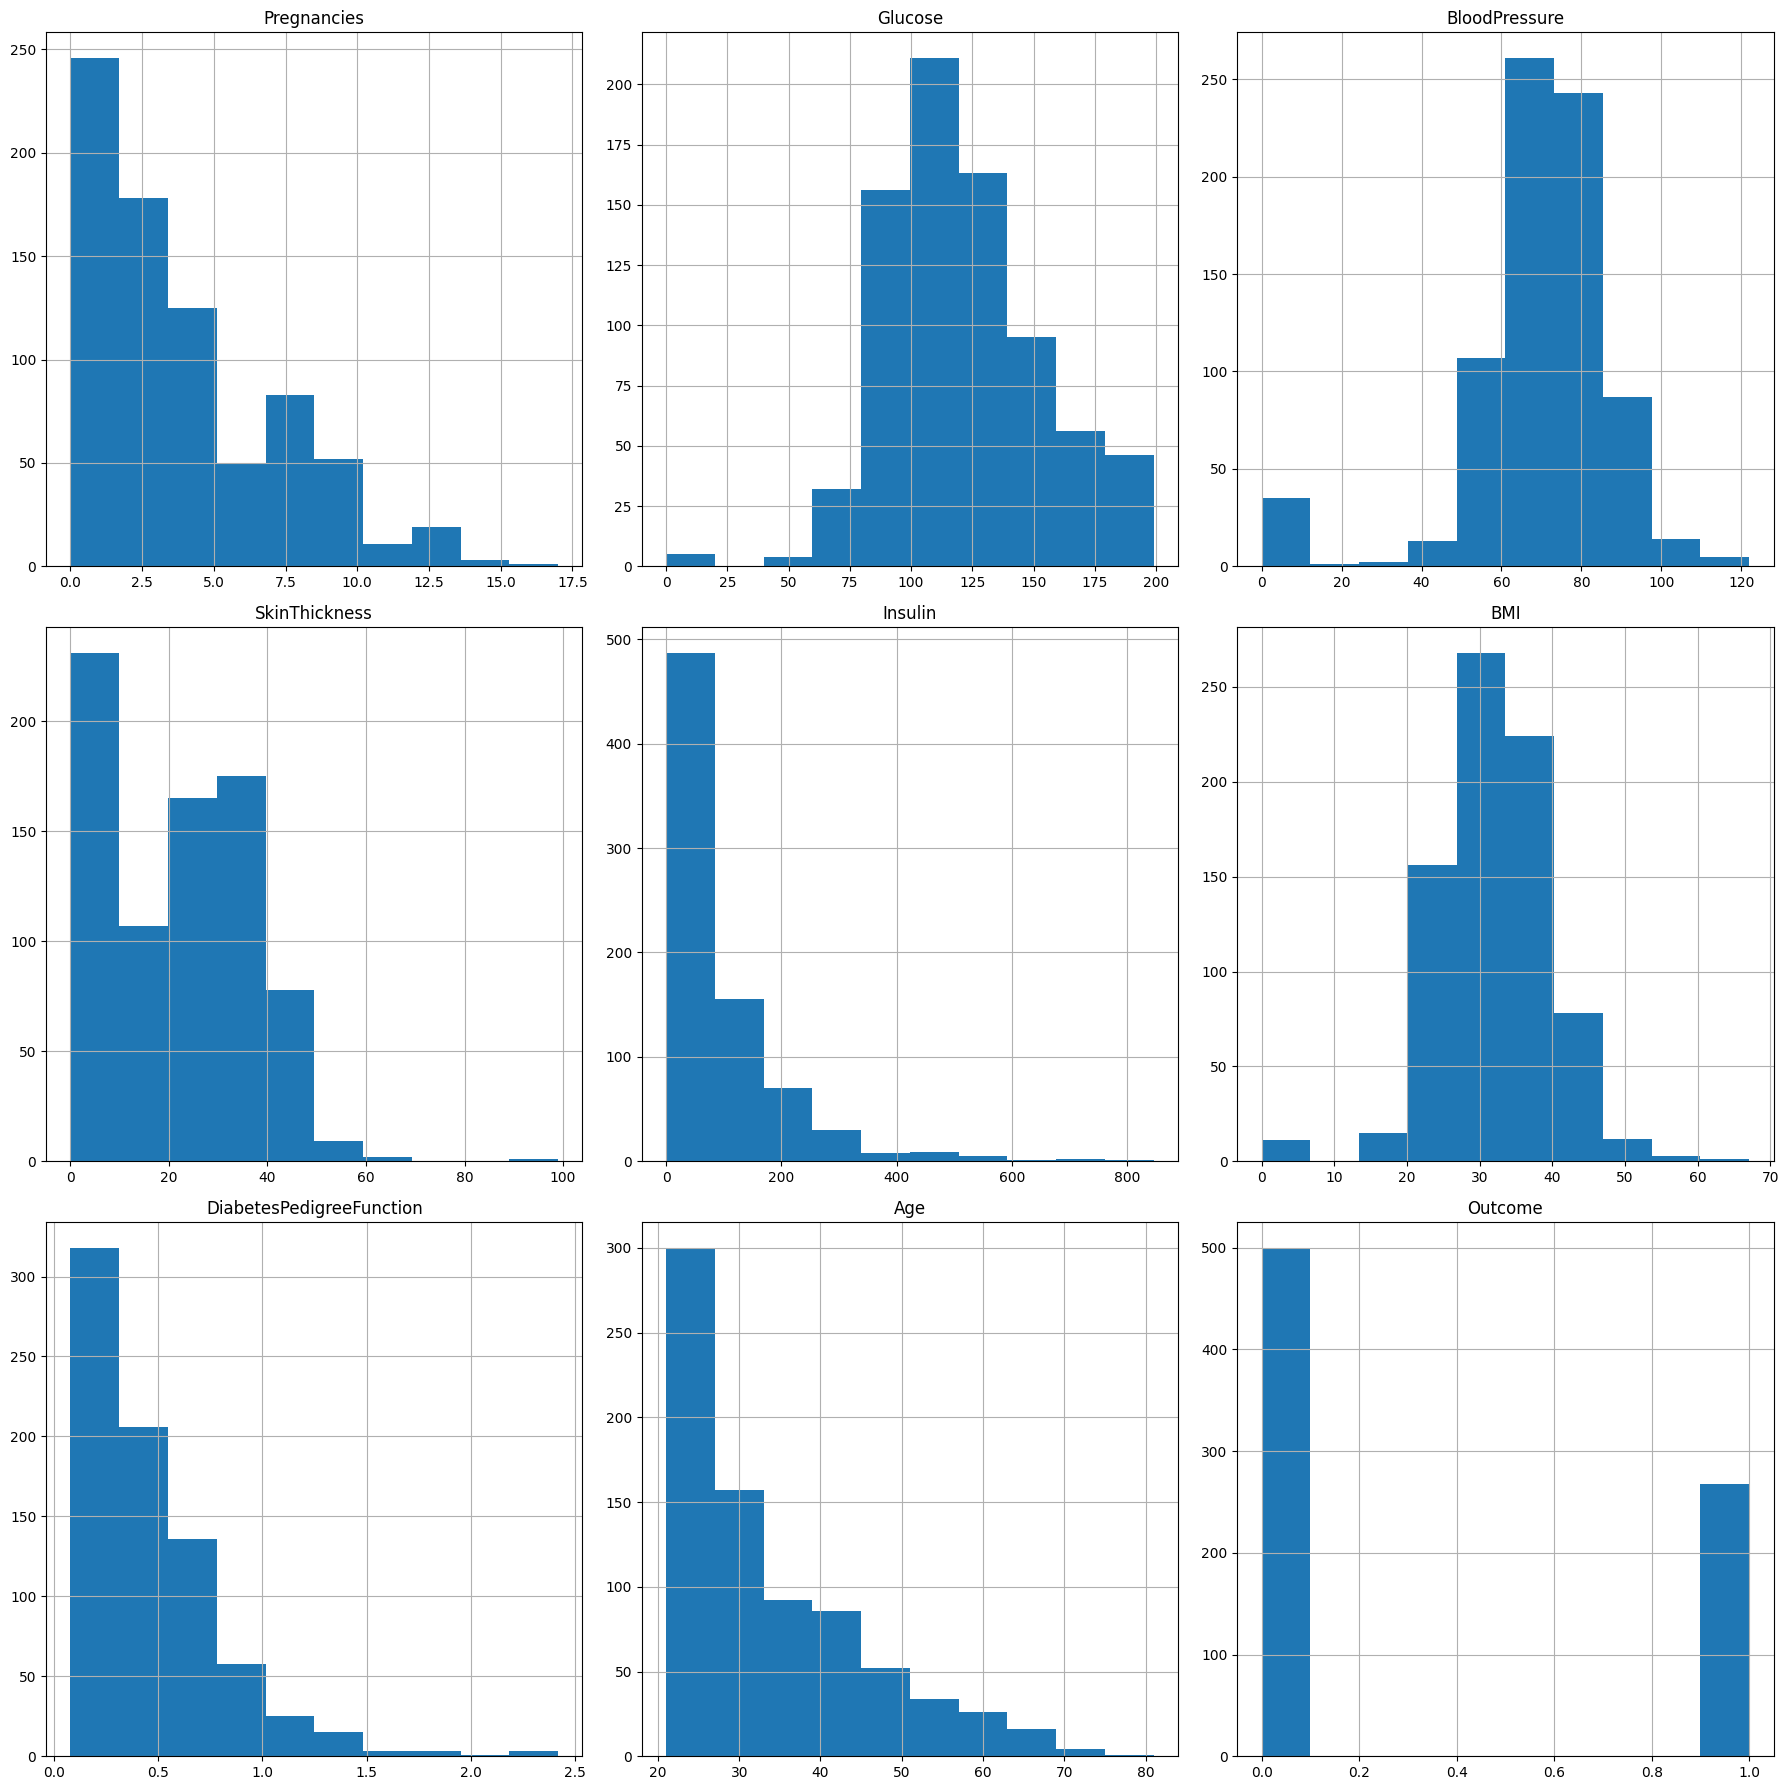

In [29]:
diabetes_df.hist(figsize=(18,18))
plt.tight_layout()
plt.show()

# Imputing missing values

In [30]:
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean())
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean())
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median())
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median())
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median())

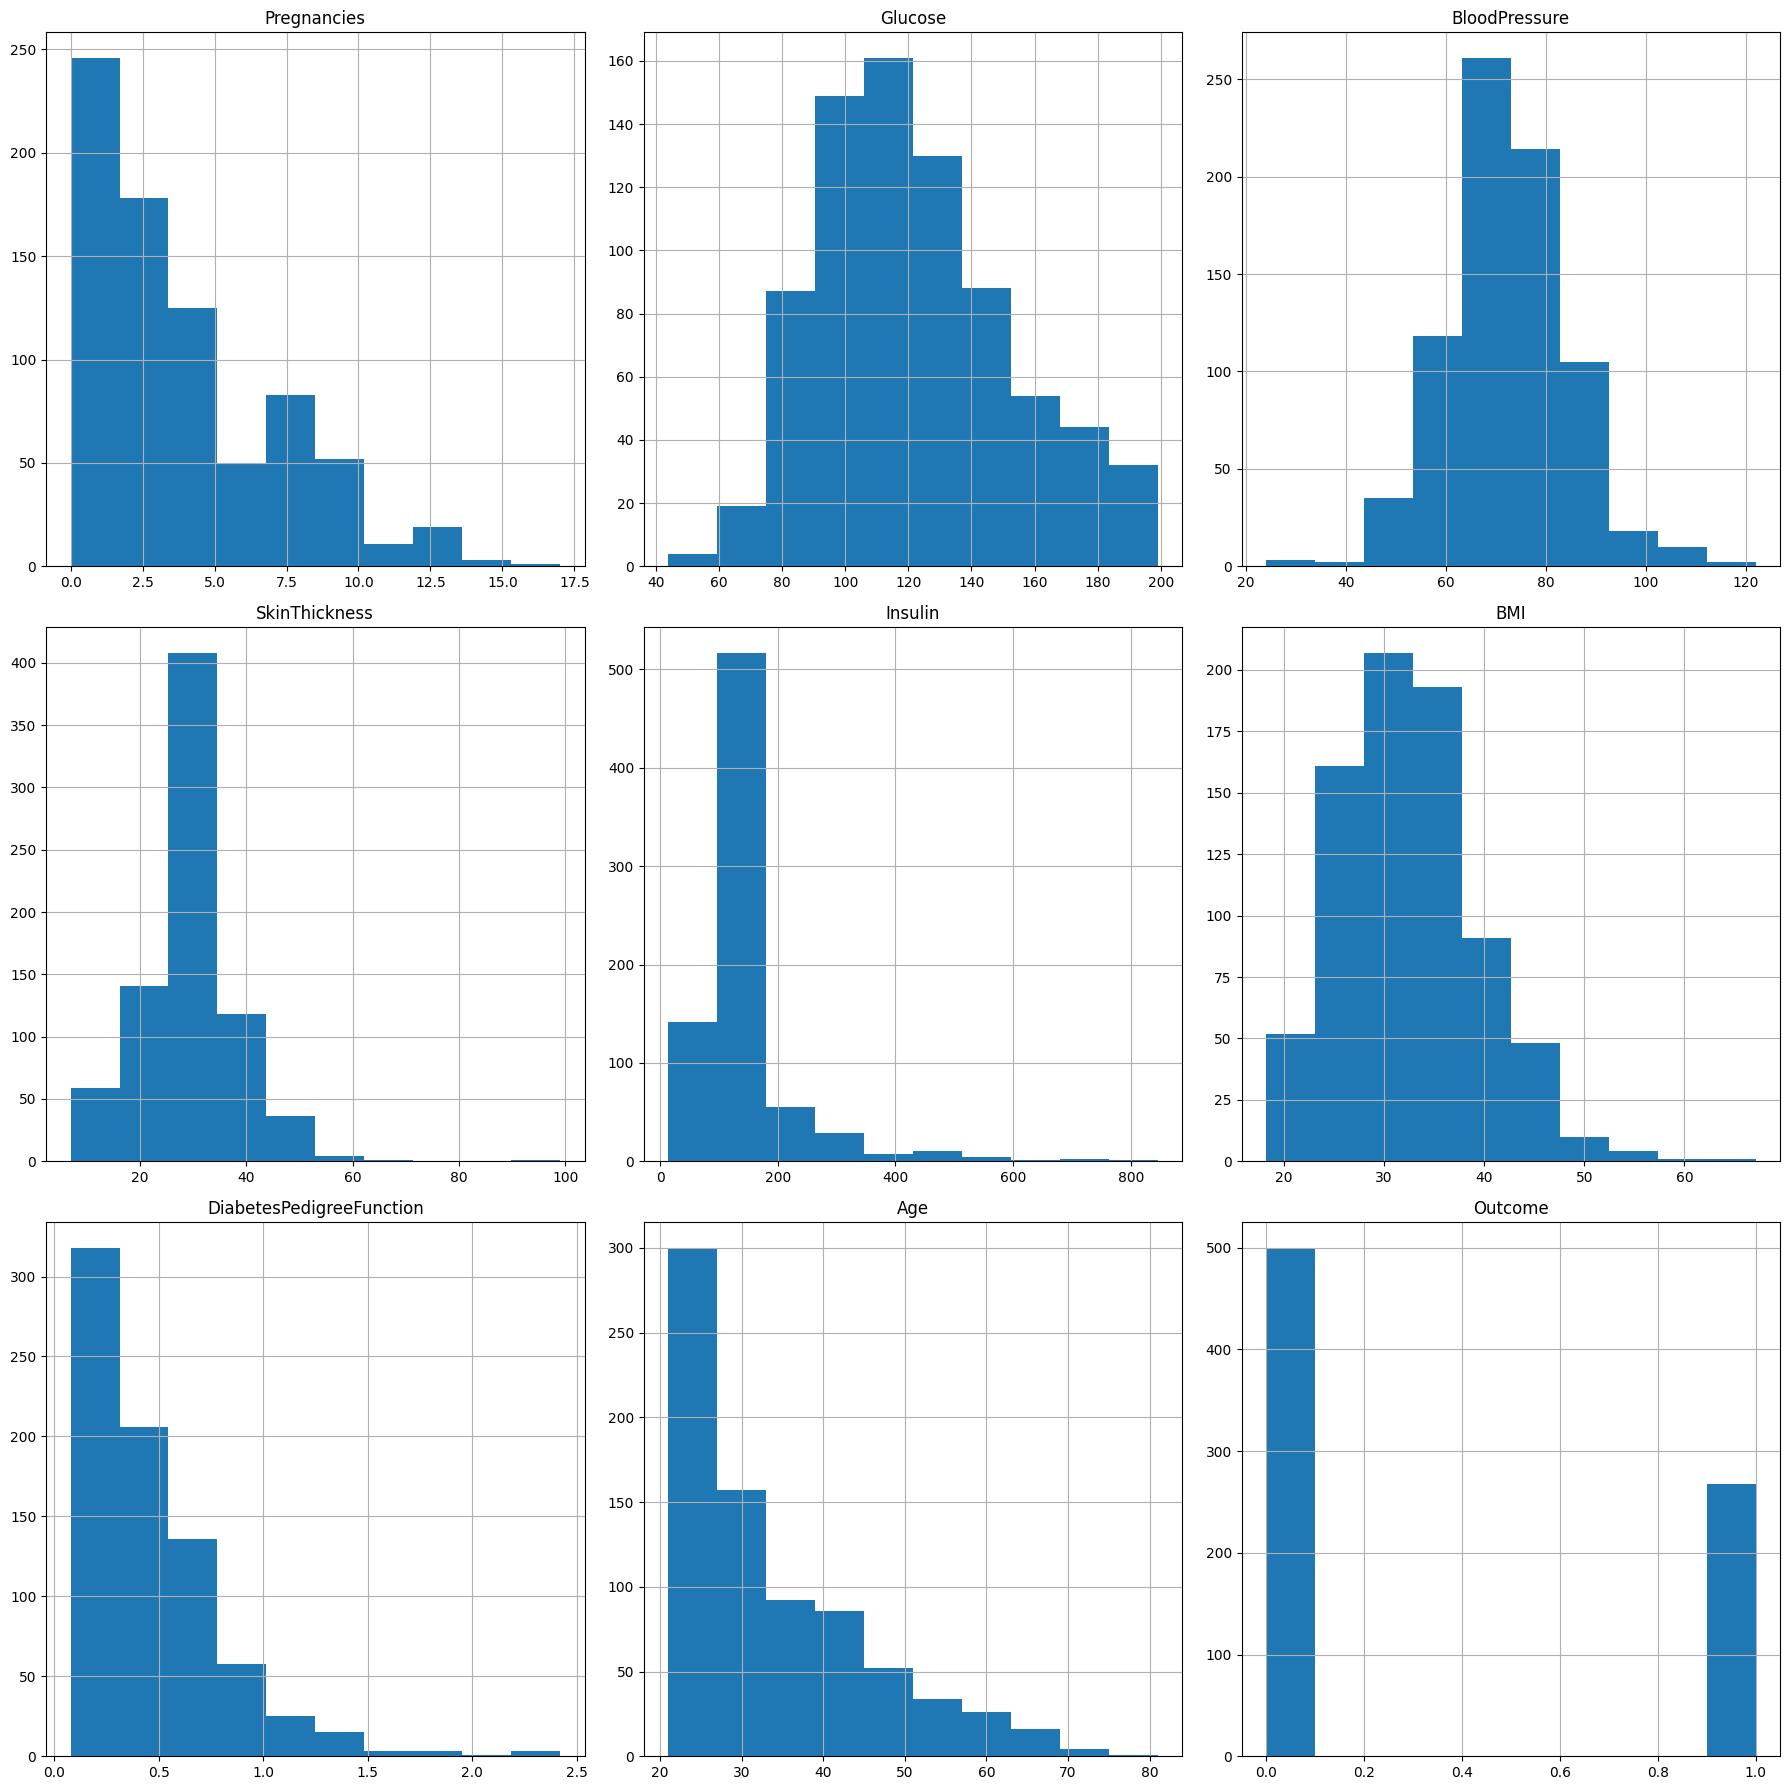

In [31]:
diabetes_df_copy.hist(figsize=(18,18))
plt.tight_layout()
plt.show()

# Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

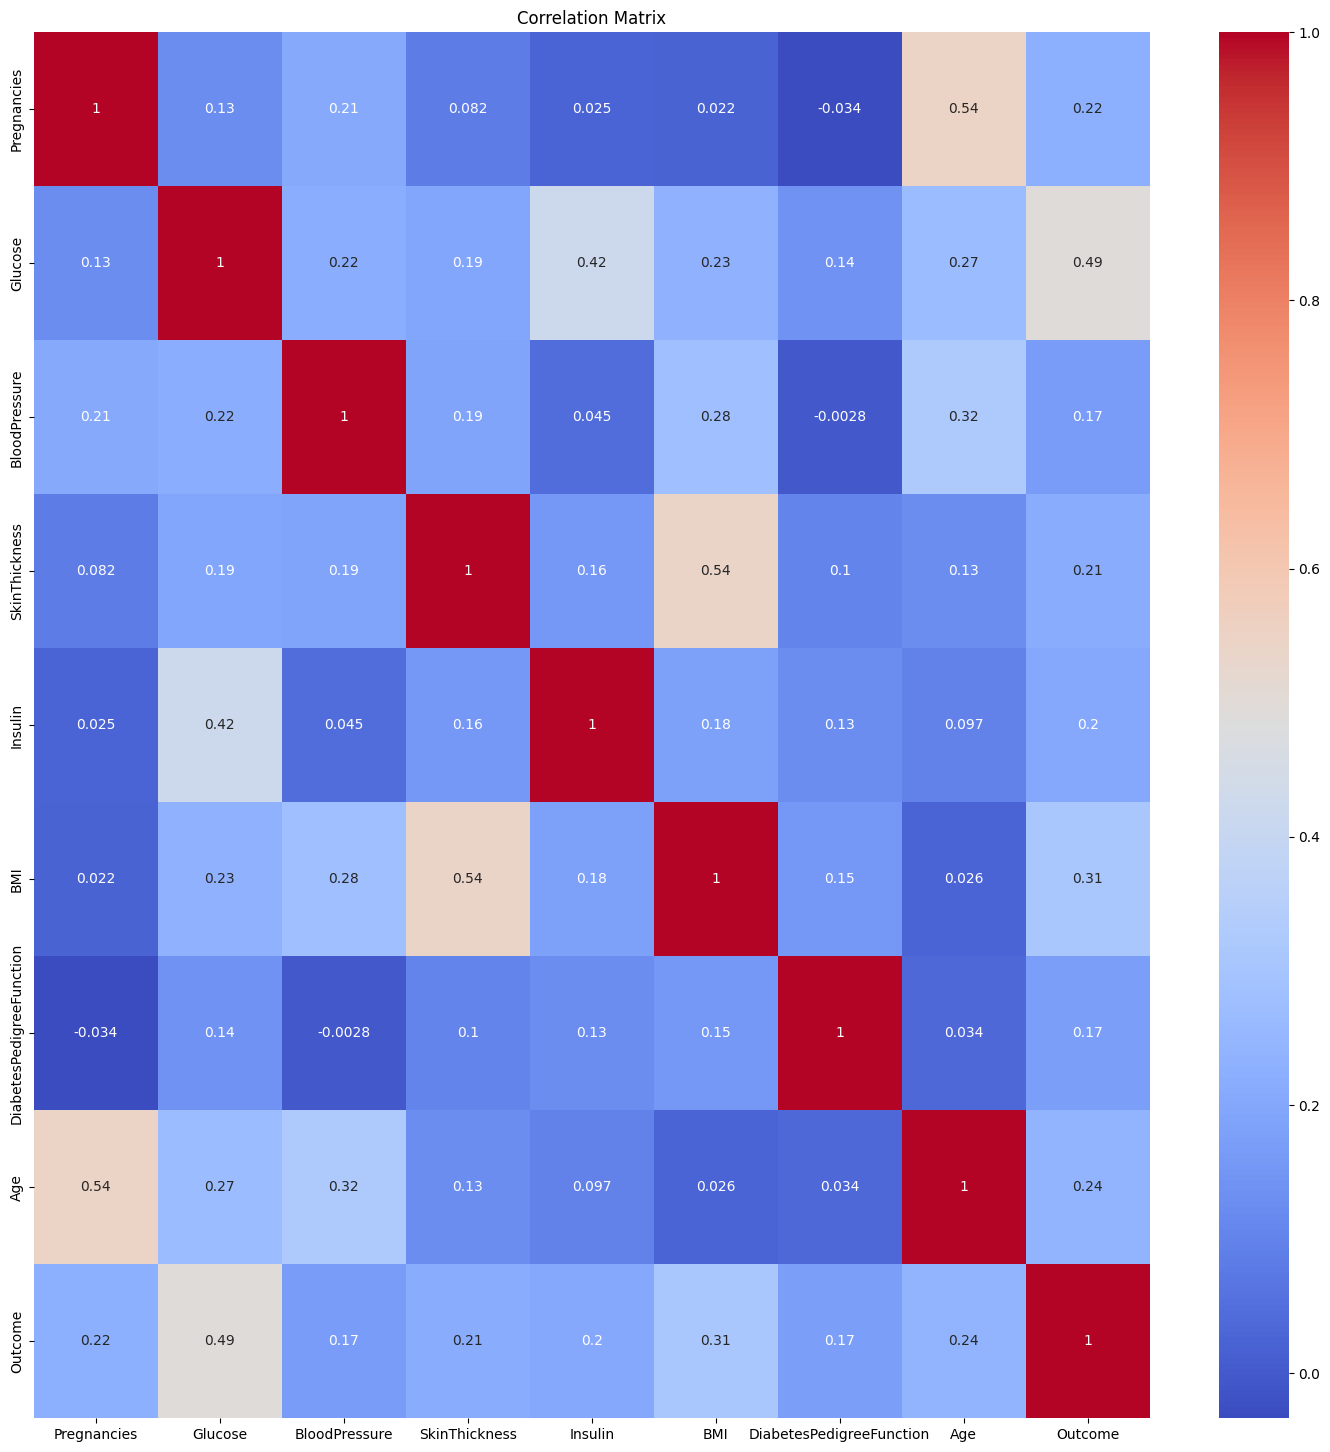

In [32]:
plt.figure(figsize=(18,18))
sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Splitting data

In [33]:
processed_dataset_path = '../data/processed/diabetes.csv'
diabetes_df_copy.to_csv(processed_dataset_path, index=False)

X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=random_state,
                                                   stratify=y)

# Training Random Forest

In [34]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rf_train = rf_model.predict(X_train)
print(f'Training accuracy: {metrics.accuracy_score(y_train, rf_train)}')

Training accuracy: 1.0


In [36]:
y_pred = rf_model.predict(X_test)
print(f'Testing accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Testing accuracy: 0.7272727272727273


In [37]:
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



In [38]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)


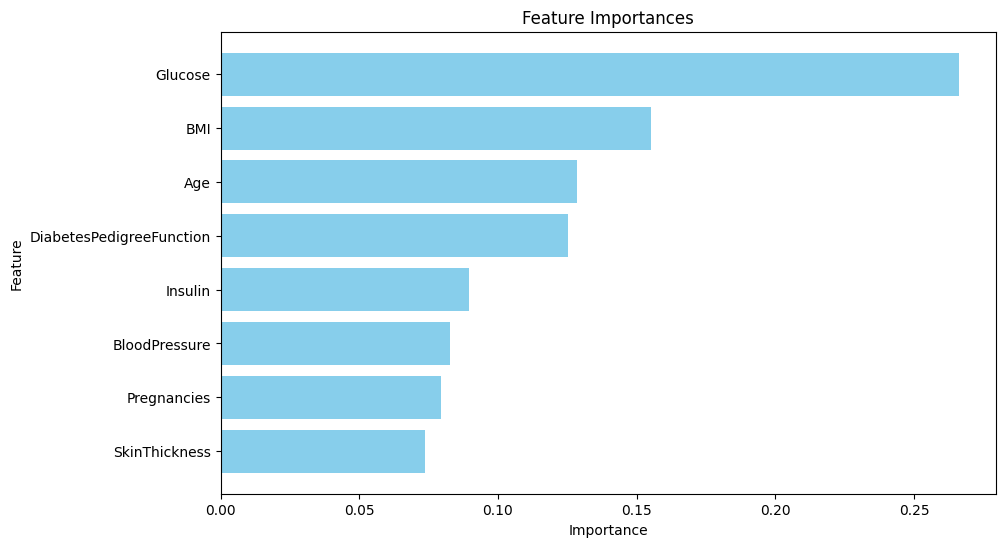

In [39]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [40]:
with open("../models/random_forest.joblib", "wb") as f:
    dump(rf_model, f, protocol=5)